# **Titanic - Machine Learning from Disaster**

Challenge:
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there were not enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

What Data Will I Use in This Competition?
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled train.csv and the other is titled test.csv.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.shape
test.shape

(418, 11)

In [ ]:
train.sample(10)
test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
380,1272,3,"O'Connor, Mr. Patrick",male,NaN,0,0,366713,7.7500,NaN,Q
51,943,2,"Pulbaum, Mr. Franz",male,27.0,0,0,SC/PARIS 2168,15.0333,NaN,C
146,1038,1,"Hilliard, Mr. Herbert Henry",male,NaN,0,0,17463,51.8625,E46,S
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
386,1278,3,"Aronsson, Mr. Ernst Axel Algot",male,24.0,0,0,349911,7.7750,NaN,S
133,1025,3,"Thomas, Mr. Charles P",male,NaN,1,0,2621,6.4375,NaN,C
237,1129,3,"Baccos, Mr. Raffull",male,20.0,0,0,2679,7.2250,NaN,C
338,1230,2,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5000,NaN,S
190,1082,2,"Angle, Mr. William A",male,34.0,1,0,226875,26.0000,NaN,S
125,1017,3,"Cribb, Miss. Laura Alice",female,17.0,0,1,371362,16.1000,NaN,S


In [ ]:
#Checking the data fulfillment
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Dropping all the unrequired columns
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [ ]:
#To check the null values in a columns
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [ ]:
#Filled the required value which were left
train['Embarked'].fillna('S',inplace=True)


In [ ]:
#We need to fill the fare  column
missing_fare = test[test['Fare'].isnull()]
missing_fare['Pclass']

#Now as we know that he is from Pclass 3 so we will find the avg fare in class 3
# Filter the data for passengers in 3rd Pclass
third_class_passengers = train[train['Pclass'] == 3]

#Filling up the mean fare
test['Fare'].fillna(third_class_passengers['Fare'].mean(),inplace=True)
test.isnull().sum()


PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

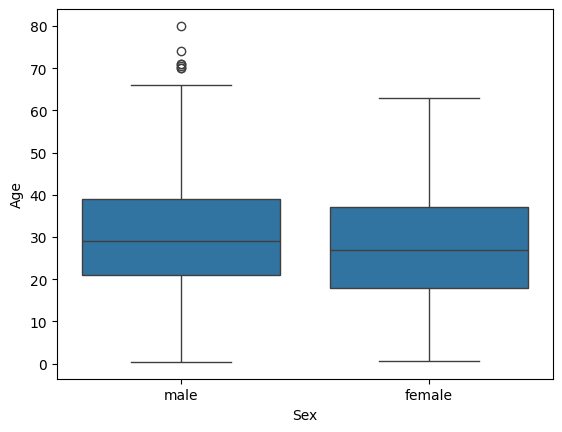

In [ ]:
#Finding the most probable value for the age gaps to be filled
sns.boxplot(x='Sex', y='Age', data=train)

# Calculate the mean age for each sex
mean_age_by_sex = train.groupby('Sex')['Age'].mean().to_dict()

# Fill missing values in 'Age' based on the mean age for each sex
train['Age'] = train.apply(lambda row: mean_age_by_sex[row['Sex']] if pd.isnull(row['Age']) else row['Age'], axis=1)


In [ ]:
#Filling the datas in the test in another way shown by CampusX
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)
test['Age'][test['Age'].isnull()]=test_age

<ipython-input-14-7be8a82e1df3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


Now we are starting EDA Analysis

This analysis technique by groupby is used for categorical data onlt

In [ ]:
#Trying to locate how Passenger class is dependant on survival
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [ ]:
#Trying to locate how Sex is dependant on survival
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
#Trying to locate how Embarked is dependant on survival
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

This analysis by distplot is used by Numerical columns

<ipython-input-18-a07c290e1939>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
<ipython-input-18-a07c290e1939>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==1])


<Axes: xlabel='Age', ylabel='Density'>

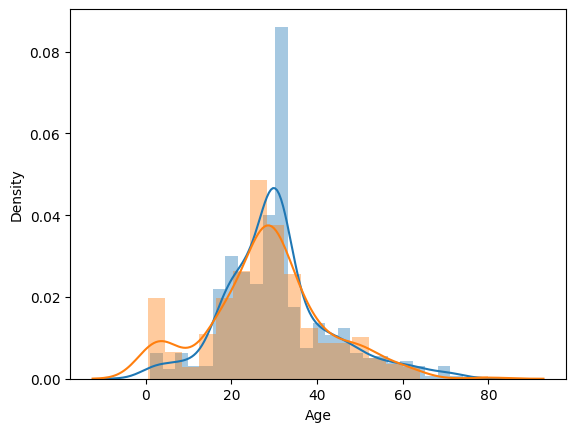

In [ ]:
#Making a distplot of the numerical data
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

<ipython-input-19-da397264b554>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])
<ipython-input-19-da397264b554>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==1])


<Axes: xlabel='Fare', ylabel='Density'>

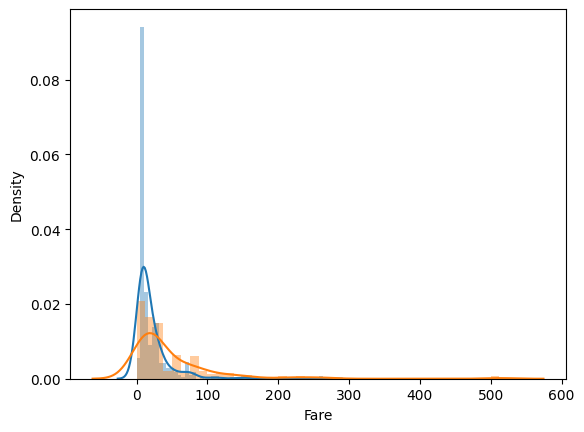

In [ ]:
#Making a distplot of the numerical data to get an idea of Fare related survival
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [ ]:
#Creating a family column to get how many people of the same family were travelling together
train['Family']=train['SibSp']+train['Parch']+1

#Percent of the people who survived travelling with family
train.groupby(['Family'])['Survived'].mean()*100

Family
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64

In [ ]:
#Creating a family column to get how many people of the same family were travelling together
test['Family']=test['SibSp']+test['Parch']+1
test['Family']

0      1
1      2
2      1
3      1
4      3
      ..
413    1
414    1
415    1
416    1
417    3
Name: Family, Length: 418, dtype: int64

<ipython-input-22-4b082243193d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Family'][train['Survived']==0])
<ipython-input-22-4b082243193d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Family'][train['Survived']==1])


<Axes: xlabel='Family', ylabel='Density'>

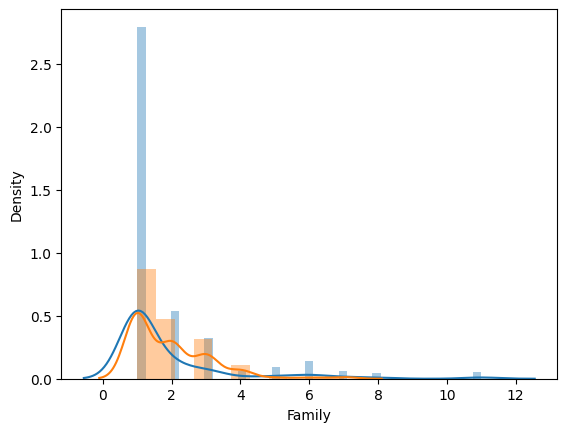

In [ ]:
#Making a distplot of the numerical data to get an idea of Family related survival
sns.distplot(train['Family'][train['Survived']==0])
sns.distplot(train['Family'][train['Survived']==1])

In [ ]:
def cal(number):
  if number==1:
    return "Alone"
  elif (number>1 and number<5):
      return "Medium"
  else:
        return "Large"

In [ ]:
#Defining a new column where we will store the status of the family size
train['Family_size']=train['Family'].apply(cal)

test['Family_size']=test['Family'].apply(cal)

In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Family_size
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,S,1,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S,1,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.45,S,4,Medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C,1,Alone
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q,1,Alone


In [ ]:
#Saving the passengerId in the test file for further results
pass_Id=test['PassengerId'].values

train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [ ]:
#Current status of the train excel file in columns

train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family         0
Family_size    0
dtype: int64

Now to apply them into model for getting the prediction outcome we need to convert the datas of the columns into numerical values from categorical values.

In [ ]:
train=pd.get_dummies(train, columns=['Pclass','Sex','Embarked','Family_size'], drop_first=True)

In [ ]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [ ]:
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,3,male,34.5,0,0,7.8292,Q,1,Alone
1,3,female,47.0,1,0,7.0000,S,2,Medium
2,2,male,62.0,0,0,9.6875,Q,1,Alone
3,3,male,27.0,0,0,8.6625,S,1,Alone
4,3,female,22.0,1,1,12.2875,S,3,Medium
5,3,male,14.0,0,0,9.2250,S,1,Alone
6,3,female,30.0,0,0,7.6292,Q,1,Alone
7,2,male,26.0,1,1,29.0000,S,3,Medium
8,3,female,18.0,0,0,7.2292,C,1,Alone
9,3,male,21.0,2,0,24.1500,S,3,Medium


In [ ]:
#Drawing the axes for starting the graph plotting for the final prediction

X=train.iloc[:,1:].values

Y=train.iloc[:,0].values

In [ ]:
#Importing the model from sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [ ]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_test)

0.7318435754189944

In [ ]:
Xf=test.iloc[:,:].values
Xf.shape

(418, 9)